In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings("ignore")
plt.style.use('ggplot')


In [2]:
train = pd.read_csv("train.csv") # importing train dataset
test = pd.read_csv("test.csv") # importing test dataset

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [162]:
train=train.drop(['PassengerId','Cabin'], axis=1)
test=test.drop(['Cabin'], axis=1)


In [163]:
train


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [164]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


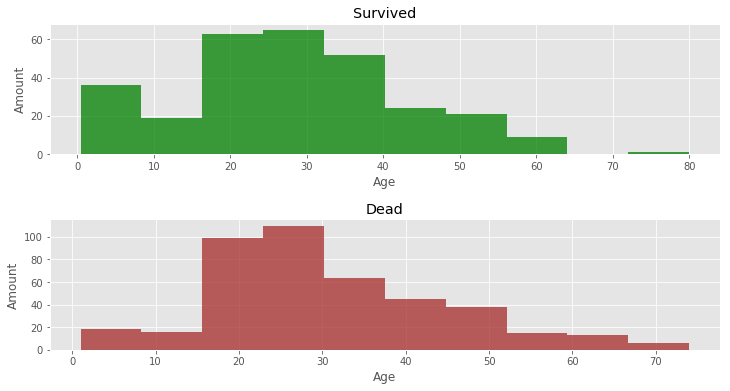

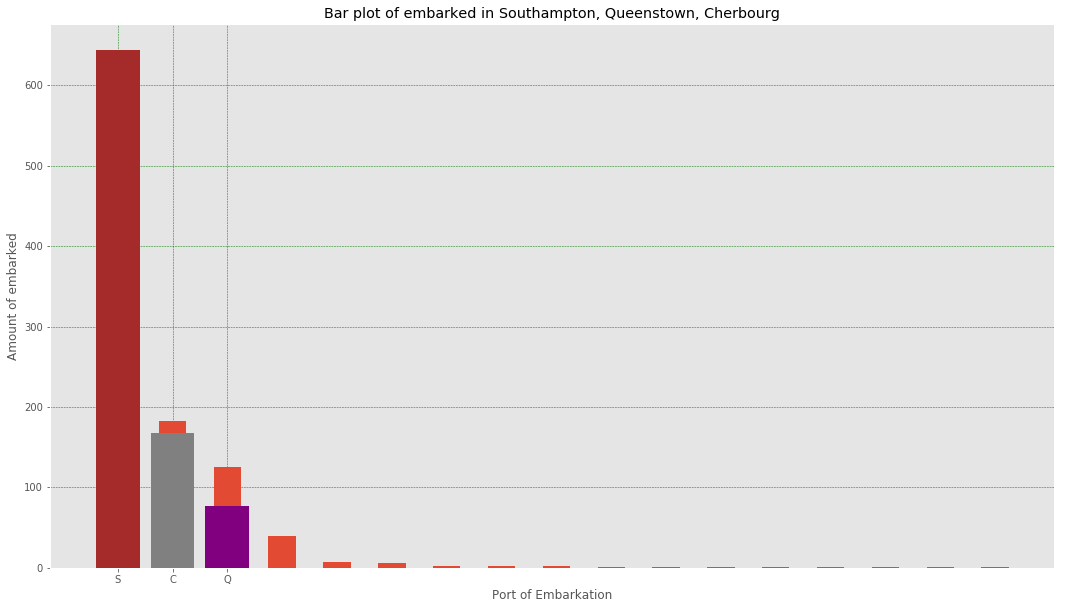

In [165]:
non_empty_embarked = train["Embarked"].dropna()
unique_values, value_counts = non_empty_embarked.unique(), non_empty_embarked.value_counts()
X = range(len(unique_values))
colors = ["brown", "grey", "purple"]
plt.bar(left=X,
        height=value_counts,
        color=colors,
        tick_label=unique_values)
plt.xlabel("Port of Embarkation")
plt.ylabel("Amount of embarked")
plt.title("Bar plot of embarked in Southampton, Queenstown, Cherbourg")
plt.show()

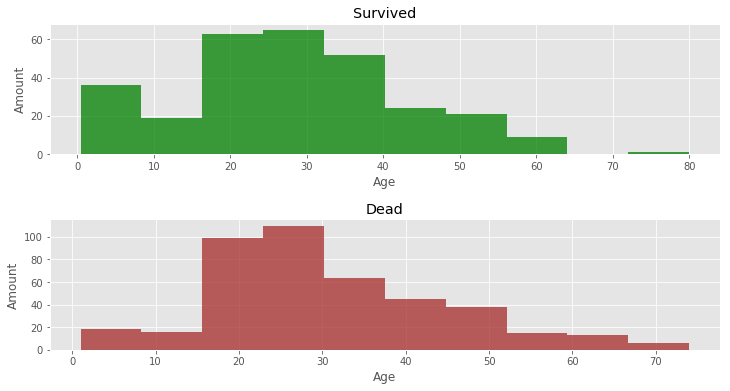

In [166]:
survived = train[train["Survived"] == 1]["Age"].dropna()
perished = train[train["Survived"] == 0]["Age"].dropna()
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 6)
fig.subplots_adjust(hspace=0.5)
ax1.hist(survived, facecolor='green', alpha=0.75)
ax1.set(title="Survived", xlabel="Age", ylabel="Amount")
ax2.hist(perished, facecolor='brown', alpha=0.75)
ax2.set(title="Dead", xlabel="Age", ylabel="Amount")
fig

In [167]:
for df in (train,test):
    df["Embarked"]=df["Embarked"].fillna("S")
    for feature in"Age","Fare":
        df[feature]=df[feature].fillna(df[feature].mean())   
test        

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00000,0,0,7538,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.00000,0,0,330972,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00000,1,1,248738,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00000,0,0,2657,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.00000,2,0,A/4 48871,24.1500,S


In [168]:
for df in train, test:
    for key, value in zip(("S", "C", "Q"), (0, 1, 2)):
        df.loc[df["Embarked"] == key, "Embarked"] = value
    for key, value in zip(("female", "male"), (0, 1)):
        df.loc[df["Sex"] == key, "Sex"] = value
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,2
3,895,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,0
5,897,3,"Svensson, Mr. Johan Cervin",1,14.00000,0,0,7538,9.2250,0
6,898,3,"Connolly, Miss. Kate",0,30.00000,0,0,330972,7.6292,2
7,899,2,"Caldwell, Mr. Albert Francis",1,26.00000,1,1,248738,29.0000,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.00000,0,0,2657,7.2292,1
9,901,3,"Davies, Mr. John Samuel",1,21.00000,2,0,A/4 48871,24.1500,0


In [169]:
for df in train, test:
    ticket_mapping = dict()
    tickets = list()
    timer = 0
    for _, sample in df.iterrows():
        if sample["Ticket"] not in ticket_mapping:
            timer += 1
            ticket_mapping[sample["Ticket"]] = timer
        tickets.append(timer)
    df["Ticket"] = tickets
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,1,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,2,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,3,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,4,53.1000,0
4,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,5,8.0500,0
5,0,3,"Moran, Mr. James",1,29.699118,0,0,6,8.4583,2
6,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,7,51.8625,0
7,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,8,21.0750,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,9,11.1333,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,10,30.0708,1


In [170]:
for df in train, test:
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1



In [5]:
for df in train, test:
    titles = list()
    for row in df["Name"]:
        surname, title, name = re.split(r"[,.]", row, maxsplit=2)
        titles.append(title.strip())
    df["Title"] = titles
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


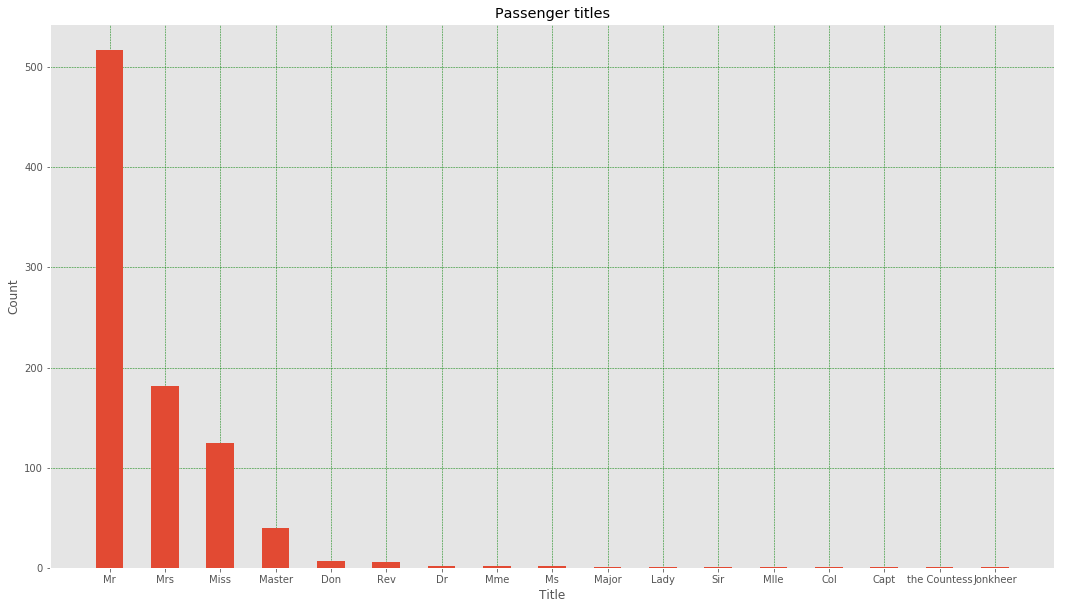

In [172]:
title = train["Title"]
unique_values, value_counts = title.unique(), title.value_counts()
X = range(len(unique_values))

fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
ax.bar(left=X, height=value_counts, width=0.5, tick_label=unique_values)
ax.set_xlabel("Title")
ax.set_ylabel("Count")
ax.set_title("Passenger titles")
ax.grid(color='g', linestyle='--', linewidth=0.5)

fig

In [173]:
for df in train, test:
    for key, value in zip(("Mr", "Mrs", "Miss", "Master", "Dr", "Rev"),
                          list(range(6))):
        df.loc[df["Title"] == key, "Title"] = value
    df.loc[df["Title"] == "Ms", "Title"] = 1
    for title in "Major", "Col", "Capt":
        df.loc[df["Title"] == title, "Title"] = 6
    for title in "Mlle", "Mme":
        df.loc[df["Title"] == title, "Title"] = 7
    for title in "Don", "Sir":
        df.loc[df["Title"] == title, "Title"] = 8
    for title in "Lady", "the Countess", "Jonkheer":
        df.loc[df["Title"] == title, "Title"] = 9
test["Title"][414] = 0
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,1,7.2500,0,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,2,71.2833,1,2,1
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,3,7.9250,0,1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,4,53.1000,0,2,1
4,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,5,8.0500,0,1,0
5,0,3,"Moran, Mr. James",1,29.699118,0,0,6,8.4583,2,1,0
6,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,7,51.8625,0,1,0
7,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,8,21.0750,0,5,3
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,9,11.1333,0,3,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,10,30.0708,1,2,1


In [174]:
for df in train, test:
    family_id_mapping = dict()
    family_ids = list()
    for index, sample in df.iterrows():
        surname = sample["Name"].split(",")[0].strip()
        family_id = surname + str(sample["FamilySize"])
        if family_id not in family_id_mapping:
            if not family_id_mapping:
                id_ = 1
            else:
                id_ = max(family_id_mapping.values()) + 1
            family_id_mapping[family_id] = id_
        family_ids.append(family_id_mapping[family_id])
    df["FamilyID"] = family_ids
    df.loc[df["FamilySize"] < 3, "FamilyID"] = 0
    df.drop("Name", axis=1, inplace=True)

In [175]:
train.sample(frac=1).head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title,FamilyID
484,1,1,1,25.000000,1,0,409,91.0792,1,2,0,0
207,1,3,1,26.000000,0,0,186,18.7875,1,1,0,0
701,1,1,1,35.000000,0,0,560,26.2875,0,1,0,0
522,0,3,1,29.699118,0,0,438,7.2250,1,1,0,0
811,0,3,1,39.000000,0,0,632,24.1500,0,1,0,0
722,0,2,1,34.000000,0,0,574,13.0000,0,1,0,0
593,0,3,0,29.699118,0,2,490,7.7500,2,3,2,172
494,0,3,1,21.000000,0,0,416,8.0500,0,1,0,0
573,1,3,0,29.699118,0,0,475,7.7500,2,1,2,0
25,1,3,0,38.000000,1,5,25,31.3875,0,7,1,25


In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop("Survived", axis=1), train["Survived"])

In [177]:
forest = RandomForestClassifier(n_estimators=50, criterion='gini',
                                min_samples_split=8, min_samples_leaf=4,
                                max_depth=5, random_state=1)
forest.fit(X_train, y_train)
print("Random Forest score: {0:.2}".format(forest.score(X_test, y_test)))


Random Forest score: 0.82


In [178]:
clf = RandomForestClassifier(n_estimators=50, criterion='gini',
                             min_samples_split=8, min_samples_leaf=4,
                             max_depth=5, random_state=1)
clf.fit(train.drop("Survived", axis=1), train["Survived"])
prediction = clf.predict(test.drop("PassengerId", axis=1))

submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": prediction})
submission.to_csv("submission.csv", index=False)
